# Support Vector Machines Tutorial

The **Support Vector Machines** is one of the most popular machine learning algorithm that are not only accurate but also robust to outliers. It is a **supervised learning algorithm** mostly used for classification (SVC: Support Vector Classifier) and regression(SVR: Support Vector Regression). What makes it unique is its ability to define nonlinear decision boundaries in high-dimensional variable space by solving a quadratic optimization problem. In addition to its outstanding model performance and its ability to handle both linear and nonlinear problem, the math behind the algorithm is ahead of time.

So far you have been already familiar with SVMs regarding how the hinge loss function and kernel function works in the lecture. However, SVMs is known as one of the most powerful out-of-the-box supervised machine learning algorithms. We should dive down deep to see what hidden treasures we will find in the waters below.

Therefore, in this tutorial I would like to span your understanding of SVMs from other perspectives, namely **Margin**, **Duality**, **Kernel Trick**, and **Practical Applications**


## Overview of Content

* <a href='#Margin'>Margin</a>
    * <a href='#Maximum Margin Classifier'>Maximum Margin Classifier</a>
    * <a href='#Hard Margin SVM'>Hard Margin SVM</a>
    * <a href='#Soft Margin SVM'>Soft Margin SVM</a>    
* <a href='#Duality'>Duality</a>
* <a href='#Kernel Trick'>Kernel Trick</a>
* <a href='#Model Application'>Practical Application</a>
    * <a href='#SVM & Imbalanced Dataset'>SVM & Imbalanced Dataset</a>
    * <a href='#Sentiment Analysis using SVMs'>Sentiment Analysis using SVMs</a>
* <a href='#References'>References</a>
* <a href='#Useful Resource'>Useful Resource</a>

<a id='Margin'></a>
## Margin

The idea of SVMs is simple : the algorithm creates a line(if we have only 2 features) or a hyperplane(if we have >2 features) which best separates the data into classes. With this said, for a 2-dimensional space, the decision boundary is a line, from which we can infer that **a hyperplane is an (N-1)-dimensional subspace for an N-dimensional space**.



<a id='Maximum Margin Classifier'></a>
### Maximum Margin Classifier

For better understanding Support Vector Machines, we can start with our simplest SVM: **Maximal Margin Classifier**[1]

Let's assume that we're finding the best classifier to separate several datapoints into classes. The black line represents the possible decision boundary that separates datapoints into two classes, green and red. Since the datapoints are linearly separable, we could easily find multiple ways to separate them. Now, when we introduce new points, **which classifier is better?** As it's known, the larger the distance from any points to the line/hyperplane is, the more confident the model with its classification result is, because the large distance between two classes indicates that two classes are more easily separated, which guarantees the correct classification. Thus, **C2 is obviously better**.

<img src="maximal margin.jpeg" width=500 height=150> 


In SVMs, we call the distance of the vectors from the hyperplane **Margin** and the line that maximizes is the one we will choose as the optimal hyperplane. This is so-called the *Maximum Margin Classifier*. 

To better visualize what's happening, we can plot SVM decision boundaries as follows:

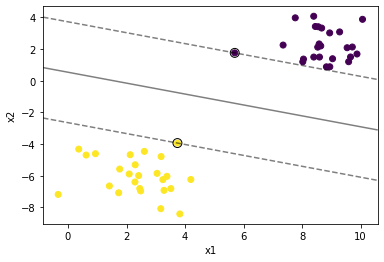

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
from sklearn.datasets import make_blobs

# we create a linearly-separable dataset
X_plot,y_plot = make_blobs(n_samples=50, centers=2, n_features=2)

# Plotting the Points
plt.scatter(X_plot[:,0], X_plot[:,1], c=y_plot)

# Limit of the axes
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Fitting the SVM Model
clf = svm.SVC(kernel='linear')
clf_fit = clf.fit(X_plot, y_plot)

# Creating the margin
xx = np.linspace(xlim[0], xlim[1], 150)
yy = np.linspace(ylim[0], ylim[1], 150)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plotting the decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                    alpha=0.5, linestyles=['--', '-', '--'])

# Circle the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
 facecolors="none", zorder=10, edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

As shown in the figure above, the points circled by black on the line are the important elements of this fit. We used these **Support Vectors** to define the hyperplane. The black line is technically the best hyperplane because it reduces the generalization error the most. When we introduce new datapoints, the **Maximum Margin Classifier** is the best hyperplane, which maximizes the margin to the hyperplace, so that it can correctly classify the new datapoints.

<a id='Hard Margin SVM'></a>
### Hard Margin SVM[2]

Given that SVM is a linear classifier, its objective is to find the appropriate β to describe the decision boundary and margin boundary(hyperplane). To get an idea of the margin maximization, let's take a closer look at the mathematical formulation of the hyperplanes defined by the support vectors.

<img src="IMG_A5A58D9F23FB-1.jpeg" width=400 height=40> 

As shown in the image, we want to maximize the distance between the left supporting hyperplane defined by $ b + w^{T}x_{neg} =-1 $ and the right supporting hyperplane defined by $ b + w^{T}x_{pos} =1$ respectively. If we use x_{pos} minus x_{neg}, we will get a vector pointing from $ b + w^{T}x_{neg} =-1 $ to $ b + w^{T}x_{pos} =1$. The distance between the left and right hyperplane is the projection, i.e. $w^{T}(x_{pos}-x_{neg}) = 2$

Recall that the length of a vector w is called its norm, which is written as $||w||$. To normalize the result, we divide the distance by the length of the vector $||w||= \sqrt{\sum^m_{j-1}w_j^2} $. The resulting equation is the **margin**:

$$ 2γ = \dfrac{w_T(x_{pos}-x_{neg})}{\lVert w \rVert} = \dfrac{1}{\lVert w \rVert} · ((1-b)-(-1-b)) = \dfrac{2}{\lVert w \rVert}$$

Basically, to find a Maximum Margin Classifier, we have to solve a constrained optimization problem. We want to maximize the margin with the contraints, such that the data labeled as -1 falls on the left side of the boundary outside or on the margin, whereas the data labeled as 1 falls on the right side of the boundary outside or on the margin. 

$$ b + w^{T}x^{(i)} \geq 1  \quad if y ^{(i)} = 1$$

$$ b + w^{T}x^{(i)} \leq -1 \quad if y ^{(i)} = -1$$

 $$ For \,i= 1,\ldots ,N $$
 

These equations can be written in one line as follows:

$$y ^{(i)} (b + w^{T}x^{(i)} )\geq 1 \ for \ each \ i$$

Note that we can simplify the maximization of $\dfrac{2}{\lVert w \rVert}$ by turning it into a minimization problem, such that we can minimize $\lVert w \rVert$ or $\dfrac{1}{2}\lVert w \rVert^2$, which is easier to convex. This is the **loss function** for SVM, which is also what we called **Hard-Margin SVM**:
 
$$ Loss(w) = \dfrac{\lVert w \rVert^2}{ 2 } $$
****

<a id='Soft Margin SVM'></a>
### Soft Margin SVM

However, Hard Margin SVM is a linear classifier, which requires the two classes to be completely linearly separated, and this might not always be the case in real life scenarios. For this reason, we introduce **Soft Margin SVM**, which allows some outliers to make sure that our function could be able to classify almost linearly separable points. The idea is to add slack variables $\xi$, which is called $Xi$, to the original loss function of Hard Margin SVM. With slack variables $\xi$, the **Soft Margin SVM** can relax some linear constraints for some non-linearly separable datapoints to make the algorithm convex[3].

Given that we have a modified loss function :  $ \quad \dfrac{\lVert w \rVert^2}{ 2 } + Loss$

\begin{equation}
Loss = 
\begin{cases}
    if \ y ^{(i)}(b + w^{T}x^{(i)}) \geq 1 \quad,   = 0 \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad (1)\\  
    if \ y ^{(i)}(b + w^{T}x^{(i)}) < 1 \quad, =  1-y ^{(i)}(b + w^{T}x^{(i)}), \text{For i= 1,... ,N} \quad \ (2)
\end{cases}
\end{equation}

The two equations can be simplified as: \begin{equation}Loss = Max \{ 0,1-y ^{(i)}(b + w^{T}x^{(i)})\}\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad (3)\end{equation}

if we combine the equation (1) and (3), the equation (1) can be written as (equivalent to what's introduced in the lecture): 

\begin{equation}
minimize_{w,b}  C\sum_{i=1}^N \max \{1-y ^{(i)}(b + w^{T}x^{(i)}), 0\} + \frac{1}{2}w^Tw
\end{equation}


After introducint $\xi$, we can rewrite the objective function as follows:  
$$ minimize_{w,b}\dfrac{\lVert w \rVert^2}{ 2 } + C\sum_{i=1}^N \xi^{(i)}$$
$$subject \ to \ y ^{(i)}(b + w^{T}x^{(i)}) \geq 1 - \xi^{(i)}, \xi \geq 0$$

$\xi^{(i)}$ = 0 indicates that the datapoints can be considered correctly labeled;    $\xi^{(i)}$ > 0 indicates that the datapoints are mislabeled. [2]

We want to ensure that the objective function is not minimized by choosing negative values of $\xi$, so that we add the constraints $\xi \geq 0$. As what the lecture has covered, a regularization term C is also introduced to determine the importance of $\xi$, which controls how the SVMs will handle errors.

When  $\xi^{(i)}$ is large enough, the contraints must be satisfied, but could it be as large as $+\infty$? Of course not, we will end up getting the same result as the Hard Margin SVM. If $\xi^{(i)}$ is too small, there will be no constraint, for which the hyperplane won't classify anything. Our objective function will be trying to get the best optimized solution that can trade off between minimizing $\xi^{(i)}$, and maximizing margin.

**From the mathemetical equation ,we can infer that our objective is to look for the hyperplane defined by $w$ and $b$, such that the margin is maximized and the loss function is minimized under the condition that all datapoints are correctly classified**

To better visualize the soft margin SVM, we can change parameter C to adjust the softness of the margin

We can observe that as C becomes smaller, it allows some points to be mislabeled, which emphasizes the importance of $\xi$ and results in a wider margin, while the larger C diminishes the significance of $\xi$ and gives you the Hard Margin SVM

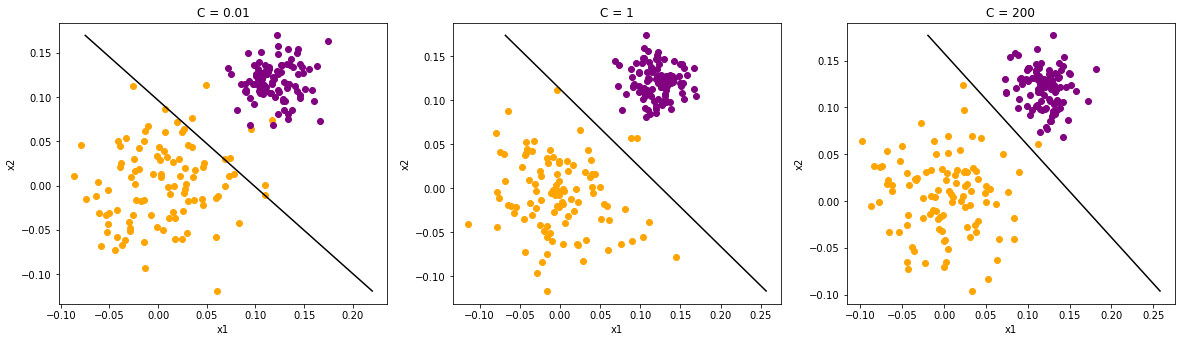

In [348]:
import warnings
C = [0.01,1,200]
plt.figure(figsize = (20,30))
ratios = [(100,100)]
count=1
with warnings.catch_warnings():
    for j,i in enumerate(ratios):
        for c in range(0, 3):
            warnings.simplefilter('ignore')
            model=svm.LinearSVC(C=C[c])
            plt.subplot(5, 3, count) 
            count+=1
            X1=np.random.normal(0,0.045,size=(i[0],2))
            X2=np.random.normal(0.12,0.02,size=(i[1],2))
            y1=np.array([1]*i[0]).reshape(-1,1)
            y2=np.array([0]*i[1]).reshape(-1,1)
            X=np.vstack((X1,X2))
            y=np.vstack((y1,y2))
            model.fit(X,y.ravel())
            plt.scatter(X1[:,0],X1[:,1],color = 'orange')
            plt.scatter(X2[:,0],X2[:,1],color='purple')
            plt.title('C = '+ str(C[c]))
            coef=model.coef_[0]
            intercept=model.intercept_
            max_model= max(X[:,1])
            min_model= min(X[:,1])
            points=np.array([[((-coef[1]*min_model - intercept)/coef[0]), min_model],[((-coef[1]*max_model - intercept)/coef[0]), max_model]])
            plt.plot(points[:,0], points[:,1],color = 'black')
            plt.xlabel("x1")
            plt.ylabel("x2")
plt.show()

<a id='Duality'></a>
## Duality

Another important feature of SVMs is **Duality**. From the equations above, we derive optimization problems that can be used to obtain the optimal hyperplane(convex) that maximizes the margin. Mathematically, optimization problems might be viewed from either of two perspective, the primal problem or the dual problem. This is what we called **the duality principle**. The solution to this dual problem offers a lower bound to the solution of the minimization(primal problem).

Q: Why solve the dual problem instead?
A: We can apply "**the kernel trick**"!(more on the next section)

Primal Problem is what we want to minimize. In the graph, $P^*$ minimizes the objective function P of Primal Problem, whereas Dual Problem is what we want to maximize. $D^*$ maximizes the Dual Objective D. For Support Vector Machine, primal and dual are equivalent(there is no duality gap between $P^*$ and $D^*$), so that solving the convex dual problem to optimality leads to optimal solution for the primal, and thus we want to convert the Primal Problem P to the Dual Problem D. 

***
SVM primal problem is defined as[2]:

$$min_{w∈R^d, b ∈R, \xi R^n} \quad \dfrac{\lVert w \rVert^2}{ 2 } + C\sum_{i=1}^N \xi^{(i)}$$
$$subject \ to \ y_i(w^Tx_i+b) ≥ 1 - \xi \quad ， For \ i= 1,... ,N$$
$$\quad \xi ≥ 0 \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad， For \ i= 1,... ,N$$



SVM dual problem is defined as[2]:

$$max_{α∈R^d} \quad g(α) = \sum_{i=1}^N α_i - \dfrac{1}{2}\sum_{i=1}^N\sum_{k=1}^Nα_iα_ky_iy_k(x_i·x_k) $$
$$subject \ \  to \ \  C≥ \alpha ≥ 0, \quad For \ i= 1,... ,N$$
$$\sum_{i=1}^Nα_iy_i = 0$$

Now the objective function is written in terms of inner products between two d-dimensional feature vectors ($x_i · x_k$), which will become *very* useful once we learn more about **Kernel Trick**!

<a id='Kernel Trick'></a>
## Kernel Trick

In practice, we have to deal with both linearly or non-linearly separable problems. Since the SVC is a linear classifier, it can fail if the data is not linearly separable. Therefore, when SVMs was developed originally, it did not capture much attention due to its limitation as a linear classifier. However, what then made SVMs shine was the idea ---- **Kernal Trick**. 

The simplest way to enable a linear model to behave non-linearly is **feature mapping**, i.e. via adding more features to transform the orginal features to create features of features. 

Recall for simple regression, for instance, we expanded the input $x∈R$ into new features $x, x^2, x^3$ to get a cubic function. In the higher dimension, $x = [x_1, x_2, ..., x_d]$, we do a quadratic transformation, which is called **feature mapping**:

$$\phi(x) = [1, \sqrt{2}x_1, \sqrt{2}x_2,...,\sqrt{2}x_d,\\
                x^2_1, x_1x_2, ..., x_1x_d,\\
                x_2x_1, x^2_2, x_2x_3,..., x_2x_d,\\
                ...,\\
                x_dx_1, x_dx_2, x_dx_3, ..., x^2_d]$$

$\phi(x)$: the vector of transformed features, which include the order-zero term(=1), all order-one terms($\sqrt{2}x_j$), as well as the order-two terms $x_ix_j$.

However, the **problem of feature mapping** is that the number of features grows exponentially, which would require a lot of storage and increasing demand for computation by the learning algoithm.

To overcome this difficulty, we employ **"Kernel Trick"**, such that we can *rewrite* many linear models in a way that $\phi(x)$ doesn't have to be computed explicitly. Thus, we can train models with the mapped feautres *without having to ever generate, store, or compute the mapped feature vectors.*[11]

*****

Recall that in the lecture, **Kernels** has been extensively covered, such that two important functions of **Kernel Function** are[6]:

* **ability to solve non-linearly separable problems by mapping the original data to a higher dimensional space** 
   
   * Non-linearly separable problems cannot be solved using Hard/Soft Margin SVM, so that we employes a kernel function to project them into higher dimensional space, such that $X(intput \ space) \ → \ Z(feature \ space) $. After the transformation, the relevant features are separated and the dataset becomes linearly separable.  (A visualized example is provided below)
    

* **ability to efficiently compute inner products between two high-dimensional feature vectors so that we can train models with the mapped features, but without having to ever generate, store, or compute the mapped feature vectors**
    
    * we used dual problem to solve the constrained optimization problem, such that the result contains $x_i^Tx_j$, which is the inner product of two feature vectors. After we transformed the original feature space into higher dimensional space, it becomes $\phi(x)^T \phi(z)$. When the number of dimensions is too high after the transformation, the higher computational power will be demanded. To avoid the efficiency being affected too much, we introduce kernel function[11]:
    
$$\phi(x) ·\phi(z) = 1+ 2x_1z_1+2x_2z_2+...+2x_dz_d+\\
x^2_1x^2_2 +x_1x_2z_1z_2 + ... +x_1x_dz_1z_d+...+ x^2_dz^2_d \\
= 1 + 2 x · z + (x · z)^2 \\
= (1+ x · z)$$

$K(x,x^{'}) = \phi(x)^T\phi(x^{'}) = <\phi(x), \phi(x^{'})> $. We can compute $φ(x)· φ(z)$ in (almost) the same amount of time as we compute $(x · z)$. 

For example, assuming that we have a RBF kernel function, defined as $K(x,x^{'}) = \exp(\frac{-\|x - x^{'}\|_2^2}{2 \sigma^2})$, we only need to calculate $K(x,x^{'})$, but not $\phi(x)$ individually

**Notice** that the formulation has to be rewritten in a way that it only ever depends on dot products between data points $x · z$, and never on the actual instances themselve. For this reason, we can replace the dot product by $K(x, z)$, which **implicitly** corresponds to learning the model in a high dimensional space.
  
* ****

Kernels are functions that quantify similarity of the samples. After we introduce the kernel function to transform the dataset from lower dimensional space to higher dimensional space, the dataset will become sparser. Thus, the non-linearly separable data will become linearly separable. There is a large "library of kernels". Some common types of kernels are already covered in the lecture, such as radial basis function(RBF), linear kernels, and polynomial kernels[4].

* **Linear Kernel** is defined by $K(x,z) = x ∙ z $, which is the dot product. Only LinearSVC and Linear SVR can use it.
* **Polynomial Kernel** is one of the commonly used non-linear separable kernel functions. The function is defined by $K(x,z) = (1+𝑥∙𝑧)^d$, such that $𝑑$ is the hyperparameters that we have to tune via cross-validation.
* **Gaussian Kernel**, which is also called **Radial Basis Function Kernel**. By default kernel parameter uses rbf as its value. **RBF** is a general purpose kernel, which can be implemented when we don't have prior knowledge about the data. The RBF Kernel is defined by:$ k(x,z) = \ exp(-𝛾{\lVert x-z \rVert^2}) $, in which 𝛾 denotes the kernel bandwidth







The mathemetical proof in the lecture has explained the idea of Kernel in an illustrative way, but here I will express it more intuitively by visualizing how **Radial Basis Function Kernel** works on the non-linear separable dataset.

Supposed that we have non-linearly separable data and apparently there is no such a simple linear hyperplane/line to separate them well in 2-dimensional space

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, 'x2')

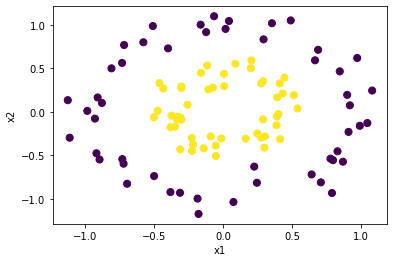

In [349]:
from sklearn.datasets.samples_generator import make_circles
# create not linearly separable dataset
X, y = make_circles(100, factor=.4, noise=.1)
clf = svm.SVC(kernel='rbf', C=1.0).fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")

However, by using RBF kernel, we transform (implicitly) the original datapoints to a 3-dimensional space. The function is able to find a linear hyperplane to separate them easily as shown below:

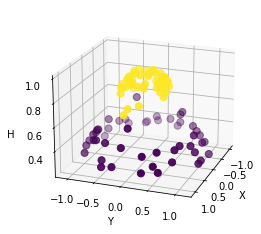

In [5]:
ax = plt.axes(projection='3d')
#create rbf kernel
rbf = np.exp(-(X ** 2).sum(1))

# scatter 3d plot
ax.scatter3D(X[:, 0], X[:, 1], rbf, c=y, s=50, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('H')
ax.view_init(elev=20, azim=20)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


Text(0, 0.5, 'x2')

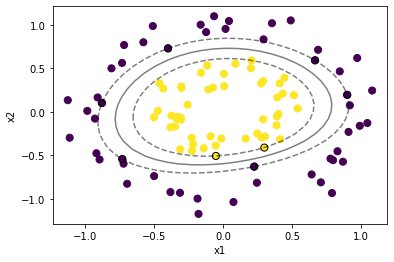

In [350]:
#train a svm classifier with rbf kernel
clf = svm.SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
#Plotting the Points
plt.figure(8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
P = clf.decision_function(xy).reshape(X.shape)

# draw decision boundary and margin boundary
ax.contour(X, Y, P, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=50, linewidth=1, facecolors='')
ax.set_xlim(xlim)
ax.set_ylim(ylim)

#draw support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=50, lw=1, facecolors='none',zorder=10, edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")

<a id='Model Application'></a>
## Practical Application

<a id='SVM & Imbalanced Dataset'></a>
### SVM & Imbalanced Dataset

So far SVMs seem to successfully perform in differet scenarios, but when faced with the challenge of imbalanced datasets, the performance of SVMs is affected significantly. Especially for the case where the number of negative instances far outnumbers the positive instances. In practice, similar applications include cancer diagnosis and credit card fraud detection, in which datasets are always highly skewed with a small number of positive cases, so that positive cases are easier classified incorrectly, but necessary to detect nevertheless.

* ****
Here we visualize how SVMs perform with respect to different proportions of negative instances:

Let's create five datasets and gradually increase the proportion of negaitve instances in each dataset, given that everything being equal.

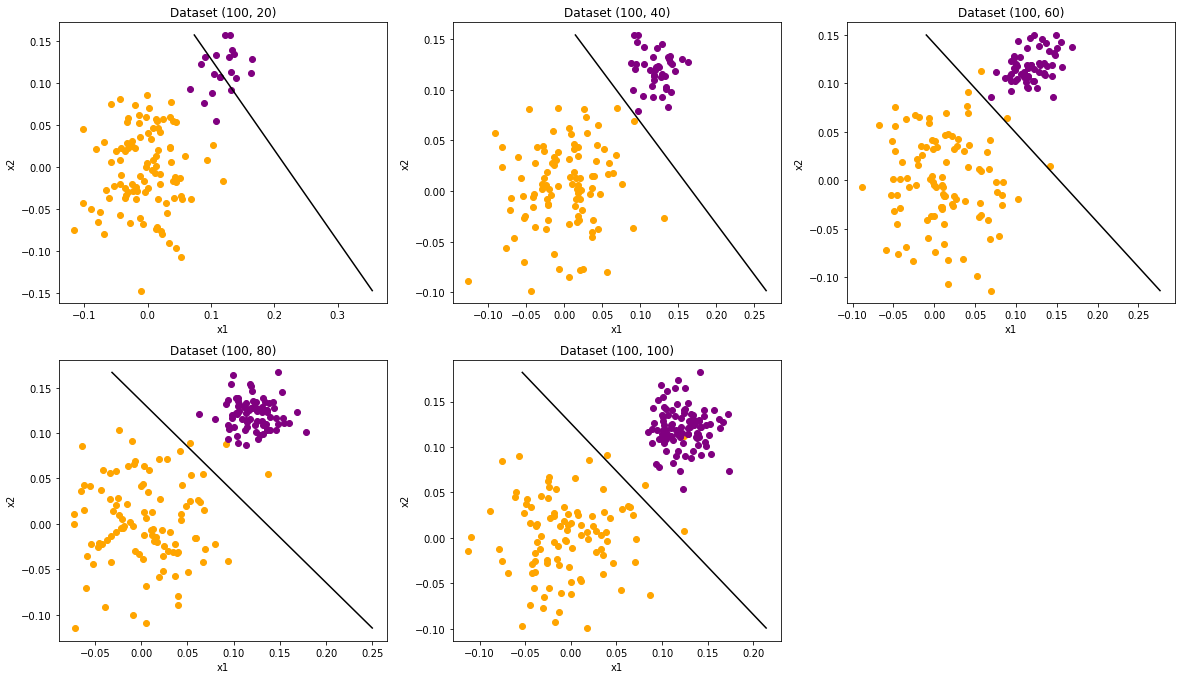

In [352]:
import warnings
plt.figure(figsize = (20,30))
ratios = [(100, 20), (100, 40), (100,60),(100, 80),(100,100)]
count=1
with warnings.catch_warnings():
    for j,i in enumerate(ratios):
        warnings.simplefilter('ignore')
        model=svm.LinearSVC()
        plt.subplot(5, 3, count) 
        count+=1
        X1=np.random.normal(0,0.045,size=(i[0],2))
        X2=np.random.normal(0.12,0.02,size=(i[1],2))
        y1=np.array([1]*i[0]).reshape(-1,1)
        y2=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X1,X2))
        y=np.vstack((y1,y2))
        model.fit(X,y.ravel())
        plt.scatter(X1[:,0],X1[:,1],color = 'orange')
        plt.scatter(X2[:,0],X2[:,1],color='purple')
        plt.title('Dataset '+str(i))
        coef=model.coef_[0]
        intercept=model.intercept_
        max_model= max(X[:,1])
        min_model= min(X[:,1])
        points=np.array([[((-coef[1]*min_model - intercept)/coef[0]), min_model],[((-coef[1]*max_model - intercept)/coef[0]), max_model]])
        plt.plot(points[:,0], points[:,1],color = 'black')
        plt.xlabel("x1")
        plt.ylabel("x2")
plt.show()

* As we can observe from the above, from the top to the bottom, the proportion of negative instances in every dataset increases. When the dataset is highly imbalanced, the hyperplane is very skewed towards the minority class, which will lead to degradation of classifier performance. 
* As the dataset becomes more balanced, the model can classify with some errors, the model seems to work better, such that hyperplane is not skewed and it can classify most of the points correctly. In the last case, where the dataset is balanced, the hyperplane can perfectly separate the positive instances from the negative instances. **In conclustion, the Support Vector Machine algorithm is more effective for balanced classification.**

<a id='Sentiment Analysis using SVMs'></a>
### Sentiment Analysis using SVMs

A supervised machine learning method, the support vector machine (SVM) algorithm has demonstrated high performance in solving classification problems. Thus it has been widely used in several fields, such as [5]

* **Outlier detection**: network traffic analysis
* **Bioinformatics**: protein classification and cancer classification
* **Handwriting recognition**
* **Banking**: credit card fraud detection and default prediction
* **The domain of social networking**: sentiment analysis
*****

Here I will provide a sentiment analysis on Twitter US Airline Sentiment using SVM model. By using text analysis and SVM model, I will perform sentiment classification at the comment level. In other words, given a review, the task consists in finding out whether it provides a positive or a negative sentiment towards the airline being discussed.

SVMs performs well for sentiment/text classiﬁcation because of its advantages in its potential to handle large features. Additionally, when there is a sparse set of instances, SVMs is robust and also because most of the problem are linearly separable [7]. SVMs has shown promising results in the field of sentiment analysis[8]

<a id='Installing Libraries'></a>
### Installing Libraries

In [732]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

#data importing
import sqlite3      
import time
import re

#pre-modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn import preprocessing 

#model training
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold

### Import Dataset

In [733]:
conn = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("""SELECT * FROM Tweets""", conn)
conn.close()
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,,,Delta,,JetBlueNews,,0,@JetBlue's new CEO seeks the right balance to ...,,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,,nesi_1992,,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.346,United,,CPoutloud,,0,@united yes. We waited in line for almost an h...,,2015-02-16 23:48:48 -0800,"Washington, DC",
3,567592368451248130,negative,1.0,Late Flight,1,United,,brenduch,,0,@united the we got into the gate at IAH on tim...,,2015-02-16 23:52:20 -0800,,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,,VahidESQ,,0,@SouthwestAir its cool that my bags take a bit...,,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


### Text Preprocessing and Data Cleaning

Since we want to predict whether the future comments are positive or negative, here we only extract the comments, for which 'airline_sentiment' are either positive or negative, and then concatenate them together to a new dataset

In [734]:
negative = df[df['airline_sentiment'] == 'negative'][['airline_sentiment', 'text']]
positive = df[df['airline_sentiment'] == 'positive'][['airline_sentiment', 'text']]
data = pd.concat([negative.iloc[:,:], positive.iloc[:,:]], axis = 0, ignore_index = True)

Clean up the raw tweet text using regular expressions and nltk

In [735]:
#Remove any URLs
data['text'] = data['text'].str.replace('http[s]?://t.co/[a-zA-Z0-9]+', '')
#parse html
data["text"] = data["text"].apply(lambda x: BeautifulSoup(x, "lxml").get_text())
#extract only text
data["text"] = data["text"].str.replace(r'[^a-zA-Z0-9]', ' ')
#remove extra space
data["text"] = data["text"].str.replace(r'\s+', ' ')
#to lowercase
data["text"] = data["text"].apply(lambda x: x.lower())


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [736]:
import nltk
nltk.download("stopwords")
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('but')

#remove stopwords
def simple_text_preprocessor(df): 
    df = ' '.join([word for word in df.split() if word not in stop_words])  
    return df

stop = np.vectorize(simple_text_preprocessor)
data['text'] = stop(data['text'].values)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cloveryang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [737]:
data.head(15)



,airline_sentiment,text
0,negative,jetblue really getting nerves nothappy
1,negative,united yes waited line almost hour passengers ...
2,negative,united got gate iah time given seats closed fl...
3,negative,southwestair cool bags take bit longer dont gi...
4,negative,united hope nicer flight time try things right...
5,negative,united like delays less one plane connect voucher
6,negative,united link current status flights airports fl...
7,negative,southwestair guys hour 2 phone hold 3am bc vol...
8,negative,united tried 2 dm would not go thru not sure
9,negative,wanted get bag benefit but instead get 25 pric...


### Resample the corpus

As we mentioned, SVMs works ineffectively on imbalanced dataset, so that I want to look at the proportion of each types of classes in the dataset.

In [738]:
data['airline_sentiment'].value_counts()

negative    9082
positive    2334
Name: airline_sentiment, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

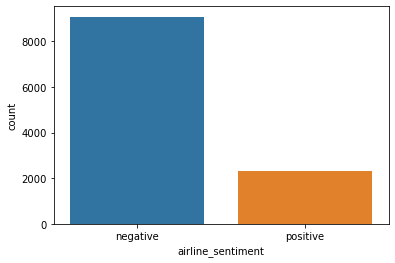

In [739]:
sns.countplot(data['airline_sentiment'])

Per observation, the negative instances are fairly high against the positive instances. To avoid the impact of imbalanced dataset, I upsample the minority class in the dataset.

In [740]:
# separate minority and majority class
positive_sentiment = data[data.airline_sentiment=='positive']
negative_sentiment = data[data.airline_sentiment=='negative']

# Oversample minority: we upsample the minority class to match the number of majority classs
positive_upsampled = resample(positive_sentiment,
                           replace = True, # Sample with replacement
                           n_samples = len(negative_sentiment), # Match the number in majority class
                           random_state=27)

upsampled = pd.concat([negative_sentiment, positive_upsampled])
upsampled.head()


,airline_sentiment,text
0,negative,jetblue really getting nerves nothappy
1,negative,united yes waited line almost hour passengers ...
2,negative,united got gate iah time given seats closed fl...
3,negative,southwestair cool bags take bit longer dont gi...
4,negative,united hope nicer flight time try things right...


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

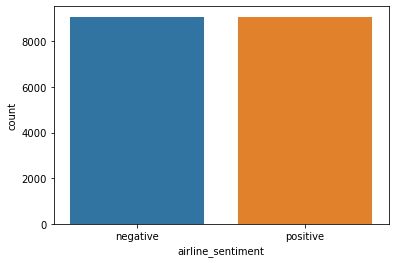

In [741]:
# plot the class distribution of training data after balanced
sns.countplot(upsampled['airline_sentiment'])

### Train Test Data Split

In [742]:
# separate feature variables from the target
X = upsampled['text']
y = upsampled['airline_sentiment']

#label encode the target variable to normalize it
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)

# Use X_train, X_test, y_train, y_test with a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### Vectorize the data

Typically we want to give suitable weights to different words, and TF-IDF is one of the most common weighting schemes used in text classification. 

**Parameter setting**:
* min_df=5 (words must be contained in more than 5 tweets)
* max_df=0.8 (discard words appering in more than 80% of the documents)
* sublinear_tf=True (use sublinear weighting, more info on [a])
* use_idf=True (enable IDF, more info on [a])

In [743]:
# Create feature vectors
tfidf_vect = TfidfVectorizer(min_df = 5, max_df = 0.8,max_features=100000,sublinear_tf=True,
                             use_idf=True)
tfidf_vect.fit(upsampled['text'])
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

### Standardization of features 

Because Support Vector Machine (SVMs) minimize the decision vector w to optimize, the best hyperplane is affected by the scale of the input features. Thus it is recommended standardized data prior to SVM model training[10].

In [744]:
#removing the mean and scaling to unit variance
stad = StandardScaler(with_mean=False) 
Xtrain_tfidf= stad.fit_transform(X_train_tfidf)
Xtest_tfidf= stad.transform(X_test_tfidf)

### Model Training

To achieve a better performance, we use GridSearchCV to look for the best parameter combination. 

In addition to distinctions between the linear kernel and RBF kernel, there are also some differences between LinearSVC() and SVC() with linear kernel:
* By default scaling, LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
* LinearSVC uses the One-vs-Rest multiclass reduction while SVC uses the One-vs-One multiclass reduction. 
* for multi-class classification problem: SVC fits N * (N - 1) / 2 models where N = the amount of classes, while LinearSVC simply fits N models. 
* for binary classification problem: one model is fit in both scenarios.

Here we compare the performance of three types of models in scikit-learn library, namely SVC() with linear kernel, SVC() with default RBF kernel and LinearSVC()



In [745]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
start = time.time()
#initiate three types of SVC classifier
clf = SVC(kernel="linear",probability = True)
param_grid = [{'gamma':[50,5,10,0.5],
             'C':[1,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=kfolds,n_jobs=-1)
gsv.fit(Xtrain_tfidf,y_train)
end = time.time()
print("Time required ="+str(end-start)+"s")

Time required =293.4413239955902s


In [746]:
start = time.time()
clf2 = LinearSVC()
param_grid2 = [{'C':[1,0.1,0.001] }]
gsv2 = GridSearchCV(clf2,param_grid2,cv=kfolds,n_jobs=-1)
gsv2.fit(Xtrain_tfidf,y_train)
end = time.time()
print("Time required ="+str(end-start)+"s")

Time required =1.2369821071624756s


In [747]:
start = time.time()
clf3 = SVC(probability = True)
gsv3 = GridSearchCV(clf3,param_grid,cv=kfolds,n_jobs=-1)
gsv3.fit(Xtrain_tfidf,y_train)
end = time.time()
print("Time required ="+str(end-start)+"s")

Time required =1050.025269985199s


In [748]:
print("Best HyperParameter of SVC() with linear kernel: ",gsv.best_params_)
print("Best HyperParameter of LinearSVC(): ",gsv2.best_params_)
print("Best HyperParameter of SVC() with RBF kernel: ",gsv3.best_params_)
print(" ")
print("Best Accuracy of SVC() with linear kernel: %.2f%%"%(gsv.best_score_*100))
print("Best Accuracy of LinearSVC(): %.2f%%"%(gsv2.best_score_*100))
print("Best Accuracy of SVC() with RBF kernel: %.2f%%"%(gsv3.best_score_*100))

Best HyperParameter of SVC() with linear kernel:  {'C': 0.001, 'gamma': 50}
Best HyperParameter of LinearSVC():  {'C': 0.001}
Best HyperParameter of SVC() with RBF kernel:  {'C': 1, 'gamma': 50}
 
Best Accuracy of SVC() with linear kernel: 93.65%
Best Accuracy of LinearSVC(): 94.34%
Best Accuracy of SVC() with RBF kernel: 95.15%


In [749]:
clf = SVC(kernel = 'linear',C= 0.001, gamma = 50 )
clf2 = LinearSVC(C=0.001)
clf3 = SVC(C= 1, gamma = 50 )

clf.fit(Xtrain_tfidf, y_train)
clf2.fit(Xtrain_tfidf, y_train)
clf3.fit(Xtrain_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)
y_pred2 = clf2.predict(X_test_tfidf)
y_pred3 = clf3.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred) * 100
acc2 = accuracy_score(y_test, y_pred2) * 100
acc3 = accuracy_score(y_test, y_pred3) * 100
print("Accuracy of SVC() with linear kernel =", acc)
print("Classification report of SVC() with linear kernel")
print(classification_report(y_test, y_pred, digits=3))
print(confusion_matrix(y_test, y_pred))
print(" ")

print("Accuracy of LinearSVC() =", acc2)
print("Classification report of LinearSVC()")
print(classification_report(y_test, y_pred2, digits=3))
print(confusion_matrix(y_test, y_pred2))
print(" ")

print("Accuracy of SVC() with RBF kernel =", acc3)
print("Classification report of SVC() with RBFkernel")
print(classification_report(y_test, y_pred3, digits=3))
print(confusion_matrix(y_test, y_pred3))

Accuracy of SVC() with linear kernel = 86.89715921603171
Classification report of SVC() with linear kernel
              precision    recall  f1-score   support

           0      0.811     0.960     0.879      2254
           1      0.952     0.779     0.857      2287

   micro avg      0.869     0.869     0.869      4541
   macro avg      0.881     0.870     0.868      4541
weighted avg      0.882     0.869     0.868      4541

[[2164   90]
 [ 505 1782]]
 
Accuracy of LinearSVC() = 88.791015194891
Classification report of LinearSVC()
              precision    recall  f1-score   support

           0      0.847     0.945     0.893      2254
           1      0.939     0.832     0.882      2287

   micro avg      0.888     0.888     0.888      4541
   macro avg      0.893     0.888     0.888      4541
weighted avg      0.893     0.888     0.888      4541

[[2130  124]
 [ 385 1902]]
 
Accuracy of SVC() with RBF kernel = 49.63664391103281
Classification report of SVC() with RBFkernel
  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


As we can notice that:

* **LinearSVC() performs much faster than SVC() with linear kernel. The training time of SVC() with RBF kernel is 3 times that of SVC() with linear kernel**
    * scikit-learn relies on different C libraries. In particular, the underlying estimators for SVC() is libSVM, which do not penalize the intercept, while LinearSVC() is implemented using liblinear, which does in fact penalize the interceptis. Liblinear estimators are optimized for a linear case and thus converge faster on a large amount of data than libsvm. Therefore, LinearSVC() takes less time to train[9].

* **The linear kernels performs much better than the default RBG kernel**
    * As a Rule of Thumb: when the number of features is much higher than the number of examples (reviews), a linear kernel is probably the preferred choice; while RBF is a general purpose kernel, which can be implemented when we don't have prior knowledge about the data and dataset is non-linearly separable
    
* **LinearSVC() has better model accuracy and generalization ability than the other two models**

**In conclusion, from the perspectives of training efficiency and generalization, LinearSVC() is the best model among all three models**

### Test the model on real reviews

Lastly, we test the model by plugging in some real reviews. The predicted sentiment analysis result is correct.

In [750]:
review = """SUPERB, I AM IN LOVE IN JETBLUE"""
review_vector = tfidf_vect.transform([review]) 
print(clf2.predict(review_vector))

review = """Do not go with this airline."""
review_vector = tfidf_vect.transform([review]) 
print(clf2.predict(review_vector))

review = """I received bad customer service. Very upset"""
review_vector = tfidf_vect.transform([review]) 
print(clf2.predict(review_vector))

[1]
[0]
[0]


<a id='References'></a>
## References

1. "Statistical Learning (IV): Support Vector Machine": https://towardsdatascience.com/statistical-learning-iiii-support-vector-machine-632df8da0b41
2. "Introduction to Machine Learning CMU-10701 - Support Vector Machines": http://www.cs.cmu.edu/~aarti/Class/10701_Spring14/slides/SupportVectorMachines_annotatedonclass.pdf
3. "Andrew Ng's note on SVMs": https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf
4. "sklearn.svm.SVC": https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
5. "8 Unique Real-Life Applications of SVM": https://medium.com/@rinu.gour123/8-unique-real-life-applications-of-svm-8a96ca43313
6. The lecture note of 15688 Practical Data Science
7. T. Joachims, “Text categorization with support vector machines: Learn-ing with many relevant features,” in Machine Learning: ECML-98, ser.Lecture Notes in Computer Science, C. N´edellec and C. Rouveirol, Eds.Springer Berlin Heidelberg, 1998, vol. 1398, pp. 137–142
8. B. Pang, L. Lee, and S. Vaithyanathan, “Thumbs up?: Sentimentclassiﬁcation using machine learning techniques,” in Proceedings ofthe ACL-02 Conference on Empirical Methods in Natural LanguageProcessing - Volume 10, ser. EMNLP ’02. Stroudsburg, PA, USA:Association for Computational Linguistics, 2002, pp. 79–86
9. "LIBSVM: A Library for Support Vector Machines": https://www.csie.ntu.edu.tw/~cjlin/papers/libsvm.pdf
10. "Preprocessing data": https://scikit-learn.org/stable/modules/preprocessing.html
11. An Introduction to Statistical Learning, Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani
12. Machine Learning: A Probabilistic Perspective, Kevin P. Murphy

<a id='Useful Resource'></a>
## Useful Resource 

a. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

b. Procedure of sentiment analysis using SVM: https://towardsdatascience.com/a-three-level-sentiment-classification-task-using-svm-with-an-imbalanced-twitter-dataset-ab88dcd1fb13